In [69]:
# Установка transformers
!pip install transformers

You should consider upgrading via the 'c:\python\python38\python.exe -m pip install --upgrade pip' command.


In [70]:
#Установка catboost
!pip install catboost

You should consider upgrading via the 'c:\python\python38\python.exe -m pip install --upgrade pip' command.


In [71]:
import pandas as pd
from itertools import groupby

In [72]:
#import необходимых модулей

import pandas as pd
import yaml
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from catboost import CatBoostClassifier, Pool
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

In [73]:
#Считывание данных в DataFrame 
train= pd.read_csv('train_united.csv', sep=';', index_col=None)
test= pd.read_csv('test_united.csv', sep=';', index_col=None)


In [74]:
# Замена Null
train=train.fillna(0)
test=test.fillna(0)
train.loc[(train['Образование']==0),'Образование']='Неизвестно'
train.loc[(train['Специальность']==0),'Специальность']='Неизвестно'
test.loc[(test['Образование']==0),'Образование']='Неизвестно'
test.loc[(test['Специальность']==0),'Специальность']='Неизвестно'

In [75]:
train

,id,Код подразделения,type,Заданий без нарушений срока,более 30 дней средняя просрочка,более 30 дней число просрочек,до 30 дней средняя просрочка,до 30 дней число просрочек,до 7 дней средняя просрочка,до 7 дней число просрочек,Образование,Специальность,Табельный номер руководителя,Обучений количество,Будни FromUser Число звонков,Будни FromUser Время звонков,Будни ToUser Число звонков,Будни ToUser Время звонков,Выходные дни FromUser Число звонков,Выходные дни FromUser Время звонков,Выходные дни ToUser Число звонков,Выходные дни ToUser Время звонков,Будни Нет опоздания,Будни Нет опоздания Время опозданий,Будни Опоздание,Будни Опоздание Время опозданий,Выходные дни Нет опоздания,Выходные дни Нет опоздания Время опозданий,Выходные дни Опоздание,Выходные дни Опоздание Время опозданий,Будни Дни Всего,Будни Среднее время,Выходные дни Всего,Выходные дни Среднее время,Будни Компьютер всего,Будни Компьютер среднее,Выходные Компьютер всего,Выходные Компьютер среднее,Будни Монитор количество,Будни Монитор активность,Будни Монитор общее,Выходные Монитор количество,Выходные Монитор активность,Выходные Монитор общее
0,ОРГ1-02050,ОРГ1,2,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,"Неполное высшее образование, Высшее образовани...","Технологические машины и оборудование, Техноло...",не указано,2.0,370.0,18.553889,176.0,8.224444,0.0,0.000000,0.0,0.000000,109.0,0.042881,5.0,17.326990,0.0,0.000000,0.0,0.000000,31.0,8.376882,0.0,0.0,113.0,24445.805310,0.0,0.000000,1166.0,2191.901372,7987.377358,34.0,0.000000,86203.147059
1,ОРГ1-02783,ОРГ1,2,256.0,45.000000,7.0,19.080000,25.0,3.833333,18.0,Высшее образование,Автоматизация технологических процессов и прои...,ОРГ1-01974,1.0,1245.0,24.136389,657.0,25.798333,0.0,0.000000,0.0,0.000000,122.0,0.091828,4.0,11.991905,0.0,0.000000,3.0,30.533036,0.0,0.000000,0.0,0.0,125.0,29276.392000,3.0,2800.333333,1450.0,2311.164828,6031.781379,49.0,140.918367,55360.040816
2,ОРГ2-06173,ОРГ2,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,Высшее образование,Управление качеством,ОРГ2-01170,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,129.0,0.533602,21.0,90.838534,17.0,0.026734,1.0,0.231570,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,ОРГ2-05359,ОРГ2,2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,Среднее профессиональное образование,Технолог-сварщик,ОРГ2-09100,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,110.0,0.106454,6.0,26.725031,9.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,116.0,17572.482759,9.0,11504.444444,1113.0,1405.930818,2003.082659,62.0,1255.580645,1849.064516
4,ОРГ1-00803,ОРГ1,2,141.0,484.000000,4.0,0.000000,0.0,2.666667,15.0,Высшее образование,Журналистика,не указано,1.0,6.0,0.013889,1.0,0.032500,0.0,0.000000,0.0,0.000000,1.0,0.000000,33.0,135.770319,1.0,0.000000,2.0,13.843438,0.0,0.000000,0.0,0.0,33.0,2164.757576,3.0,2900.666667,168.0,165.946429,198.267857,21.0,204.095238,265.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,ОРГ1-02587,ОРГ1,2,93.0,170.700000,20.0,15.692308,13.0,2.923077,13.0,Неизвестно,Неизвестно,0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,131.0,14558.709924,38.0,12170.342105,967.0,1690.319545,2376.743537,229.0,1737.161572,2602.816594
546,ОРГ1-02383,ОРГ1,2,20.0,181.257576,66.0,19.090909,11.0,3.250000,8.0,Высшее образование,"Проектирование, сооружение и эксплуатация газо...",не указано,1.0,2644.0,115.738889,1590.0,68.900556,234.0,4.146389,102.0,2.635000,96.0,0.669084,42.0,270.227973,12.0,0.000000,12.0,104.808617,6.0,8.213889,0.0,0.0,136.0,13327.948529,24.0,5152.625000,1207.0,1343.326429,6275.495443,181.0,592.546961,15940.734807
547,ОРГ1-02862,ОРГ1,2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,Неизвестно,Неизвестно,0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000

In [76]:
test

,id,Код подразделения,type,Заданий без нарушений срока,более 30 дней средняя просрочка,более 30 дней число просрочек,до 30 дней средняя просрочка,до 30 дней число просрочек,до 7 дней средняя просрочка,до 7 дней число просрочек,Образование,Специальность,Табельный номер руководителя,Обучений количество,Будни FromUser Число звонков,Будни FromUser Время звонков,Будни ToUser Число звонков,Будни ToUser Время звонков,Выходные дни FromUser Число звонков,Выходные дни FromUser Время звонков,Выходные дни ToUser Число звонков,Выходные дни ToUser Время звонков,Будни Нет опоздания,Будни Нет опоздания Время опозданий,Будни Опоздание,Будни Опоздание Время опозданий,Выходные дни Нет опоздания,Выходные дни Нет опоздания Время опозданий,Выходные дни Опоздание,Выходные дни Опоздание Время опозданий,Будни Дни Всего,Будни Среднее время,Выходные дни Всего,Выходные дни Среднее время,Будни Компьютер всего,Будни Компьютер среднее,Выходные Компьютер всего,Выходные Компьютер среднее,Будни Монитор количество,Будни Монитор активность,Будни Монитор общее,Выходные Монитор количество,Выходные Монитор активность,Выходные Монитор общее
0,ОРГ1-02649,ОРГ1,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,Неизвестно,Неизвестно,0,0.0,4.0,0.110278,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,32.0,9.880729,0.0,0.0,56.0,21710.750000,1.0,300.000000,704.0,1548.024148,7381.465909,24.0,13.916667,85936.458333
1,ОРГ2-05929,ОРГ2,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,Высшее образование - бакалавриат,Инженерно-геодезическое обеспечение и техничес...,ОРГ2-00539,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,77.0,0.173267,18.0,85.808184,5.0,0.000000,1.0,8.356658,0.0,0.000000,0.0,0.0,94.0,15180.223404,6.0,5604.333333,679.0,1839.889543,3344.527246,21.0,1330.190476,6647.476190
2,ОРГ2-05859,ОРГ2,0,1.0,203.894737,19.0,0.000000,0.0,0.000000,0.0,Среднее общее образование,не указано,ОРГ2-04561,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,143.0,4.935355,104.0,165.960438,2.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,245.0,15580.918367,2.0,10351.500000,1628.0,1739.829853,2604.855651,16.0,876.812500,2548.687500
3,ОРГ1-00279,ОРГ1,0,490.0,35.000000,1.0,13.500000,8.0,3.055556,18.0,"Высшее образование, Повышение квалификации","Промышленное и гражданское строительство, не у...",ОРГ1-00483,2.0,4477.0,213.246667,3657.0,134.312222,7.0,0.678333,22.0,0.032778,122.0,0.344013,11.0,41.522641,1.0,0.000000,4.0,12.320011,17.0,9.030392,0.0,0.0,132.0,28066.303030,5.0,6723.800000,2272.0,1419.474912,3564.021127,56.0,500.714286,29866.732143
4,ОРГ2-01613,ОРГ2,0,6.0,207.000000,1.0,19.000000,2.0,0.000000,0.0,"Высшее образование - специалитет, магистратура",Промышленное и гражданское строительство,ОРГ2-02458,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,119.0,2.227617,17.0,19.809010,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,135.0,15394.585185,0.0,0.000000,1198.0,1394.794658,6032.730384,5.0,0.000000,85885.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,ОРГ1-02893,ОРГ1,0,4.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,Среднее профессиональное образование,Менеджмент,не указано,1.0,504.0,12.570000,853.0,25.619167,25.0,0.312500,22.0,0.829444,122.0,1.517479,110.0,610.604005,5.0,0.000000,7.0,32.147384,0.0,0.000000,0.0,0.0,162.0,14062.506173,12.0,11229.500000,1236.0,1431.918285,1930.029935,78.0,1309.333333,3609.987179
258,ОРГ2-01077,ОРГ2,0,1.0,242.500000,2.0,0.000000,0.0,2.000000,1.0,"Высшее образование - специалитет, магистратура",Астрономогеодезия,ОРГ2-09100,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,141.0,0.951791,18.0,33.131085,13.0,0.068752,11.0,40.280255,0.0,0.000000,0.0,0.0,157.0,16642.643312,24.0,2050.541667,1398.0,1705.886266,9415.769671,110.0,425.218182,18075.736364
259,ОРГ1-00469,ОРГ1,0,154.0,39.000000,17.0,17.296296,27.0,3.475000,40.0,Высшее образование,Менеджмент организации,ОРГ1

In [77]:
train.columns

Index(['id', 'Код подразделения', 'type', 'Заданий без нарушений срока',
       'более 30 дней средняя просрочка', 'более 30 дней число просрочек',
       'до 30 дней средняя просрочка', 'до 30 дней число просрочек',
       'до 7 дней средняя просрочка', 'до 7 дней число просрочек',
       'Образование', 'Специальность', 'Табельный номер руководителя',
       'Обучений количество', 'Будни FromUser Число звонков',
       'Будни FromUser Время звонков', 'Будни ToUser Число звонков',
       'Будни ToUser Время звонков', 'Выходные дни FromUser Число звонков',
       'Выходные дни FromUser Время звонков',
       'Выходные дни ToUser  Число звонков',
       'Выходные дни ToUser Время звонков ', 'Будни Нет опоздания',
       'Будни Нет опоздания Время опозданий', 'Будни Опоздание',
       'Будни Опоздание Время опозданий', 'Выходные дни Нет опоздания',
       'Выходные дни Нет опоздания Время опозданий', 'Выходные дни Опоздание',
       'Выходные дни Опоздание Время опозданий', 'Будни Дни Все

In [78]:
# бинаризируем поля трейна, категория 2= 1, остальные =0
train['Category']=0
train.loc[(train['type']==2),'Category']=1
train['Category'].value_counts()

1    298
0    252
Name: Category, dtype: int64

In [79]:
columns_to_train=['Код подразделения',  'Заданий без нарушений срока',
       'более 30 дней средняя просрочка', 'более 30 дней число просрочек',
       'до 30 дней средняя просрочка', 'до 30 дней число просрочек',
       'до 7 дней средняя просрочка', 'до 7 дней число просрочек',
       'Образование', 'Специальность', 'Табельный номер руководителя',
       'Обучений количество', 'Будни FromUser Число звонков',
       'Будни FromUser Время звонков', 'Будни ToUser Число звонков',
       'Будни ToUser Время звонков', 'Выходные дни FromUser Число звонков',
       'Выходные дни FromUser Время звонков',
       'Выходные дни ToUser  Число звонков',
       'Выходные дни ToUser Время звонков ', 'Будни Нет опоздания',
       'Будни Нет опоздания Время опозданий', 'Будни Опоздание',
       'Будни Опоздание Время опозданий', 'Выходные дни Нет опоздания',
       'Выходные дни Нет опоздания Время опозданий', 'Выходные дни Опоздание',
       'Выходные дни Опоздание Время опозданий', 'Будни Дни Всего',
       'Будни Среднее время', 'Выходные дни Всего',
       'Выходные дни Среднее время', 'Будни Компьютер всего',
       'Будни Компьютер среднее', 'Выходные Компьютер всего',
       'Выходные Компьютер среднее', 'Будни Монитор количество',
       'Будни Монитор активность', 'Будни Монитор общее',
       'Выходные Монитор количество', 'Выходные Монитор активность',
       'Выходные Монитор общее'
]

In [80]:
# выбираем поля для нейросети СatBoost по бинарной классификации

X_train=train[columns_to_train]
y_train=train[['Category']]

testnet=test[columns_to_train]

In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Код подразделения                           550 non-null    object 
 1   Заданий без нарушений срока                 550 non-null    float64
 2   более 30 дней средняя просрочка             550 non-null    float64
 3   более 30 дней число просрочек               550 non-null    float64
 4   до 30 дней средняя просрочка                550 non-null    float64
 5   до 30 дней число просрочек                  550 non-null    float64
 6   до 7 дней средняя просрочка                 550 non-null    float64
 7   до 7 дней число просрочек                   550 non-null    float64
 8   Образование                                 550 non-null    object 
 9   Специальность                               550 non-null    object 
 10  Табельный номе

In [82]:
# Определяем веса для классов кластеров
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes = np.unique(y_train), y = np.ravel(y_train))
class_weights = dict(zip(classes, weights))
class_weights

{0: 1.0912698412698412, 1: 0.9228187919463087}

In [83]:
#X_train,X_test,y_train,y_test = train_test_split(X_train, 
#                                                 y_train, 
#                                                 test_size=0.2, 
#                                                 random_state=29)

In [84]:
#Обучаем 
pool_train_solution = Pool(X_train, y_train, cat_features = ['Код подразделения','Табельный номер руководителя'], text_features = ['Образование', 'Специальность'])
#pool_test_solution = Pool(X_test,y_test, cat_features = ['Код подразделения','Табельный номер руководителя'], text_features = ['Образование', 'Специальность'])
testnet_solution = Pool(testnet, cat_features = ['Код подразделения','Табельный номер руководителя'], text_features = ['Образование', 'Специальность'])

model_test = CatBoostClassifier(iterations=100,  task_type='CPU',depth=12, verbose =True, random_seed=69, learning_rate=0.015,
                               leaf_estimation_method= 'Gradient',bootstrap_type= 'MVS',objective='MultiClass',eval_metric = 'Accuracy',loss_function='MultiClass', class_weights=class_weights)
model_test.fit(pool_train_solution,verbose=True)
#model_test.fit(pool_train_solution,eval_set=pool_test_solution,verbose=True,early_stopping_rounds=25 )



0:	learn: 0.6678651	total: 6.04s	remaining: 9m 58s
1:	learn: 0.7989374	total: 11.4s	remaining: 9m 16s
2:	learn: 0.8817647	total: 16.7s	remaining: 8m 58s
3:	learn: 0.9005273	total: 22.1s	remaining: 8m 50s
4:	learn: 0.9165468	total: 27.7s	remaining: 8m 46s
5:	learn: 0.9224992	total: 33.4s	remaining: 8m 43s
6:	learn: 0.9328726	total: 39.4s	remaining: 8m 43s
7:	learn: 0.9331789	total: 44.3s	remaining: 8m 28s
8:	learn: 0.9458427	total: 50.4s	remaining: 8m 29s
9:	learn: 0.9401965	total: 55.8s	remaining: 8m 22s
10:	learn: 0.9449238	total: 1m 1s	remaining: 8m 15s
11:	learn: 0.9395840	total: 1m 6s	remaining: 8m 8s
12:	learn: 0.9466017	total: 1m 13s	remaining: 8m 8s
13:	learn: 0.9401965	total: 1m 18s	remaining: 8m 3s
14:	learn: 0.9368408	total: 1m 23s	remaining: 7m 55s
15:	learn: 0.9401965	total: 1m 29s	remaining: 7m 49s
16:	learn: 0.9368408	total: 1m 34s	remaining: 7m 42s
17:	learn: 0.9385187	total: 1m 40s	remaining: 7m 35s
18:	learn: 0.9415681	total: 1m 45s	remaining: 7m 29s
19:	learn: 0.94324

In [85]:
# предварительный тест схождения на всем обучающем множестве
y_pred = model_test.predict(X_train)
train['69']=y_pred
train['69'].value_counts()

1    302
0    248
Name: 69, dtype: int64

In [86]:
#сохраняем вариант трейна
train_otbor=train[['id','69']]#,'45','24','69','98','15']
train_otbor.to_csv('Якутия train_69p.csv', sep=',', index=None)

In [87]:
print("Значение метрики recall на трейне : ", recall_score(y_train, y_pred, average='macro', zero_division=True))

Значение метрики recall на трейне :  0.9517817193991691


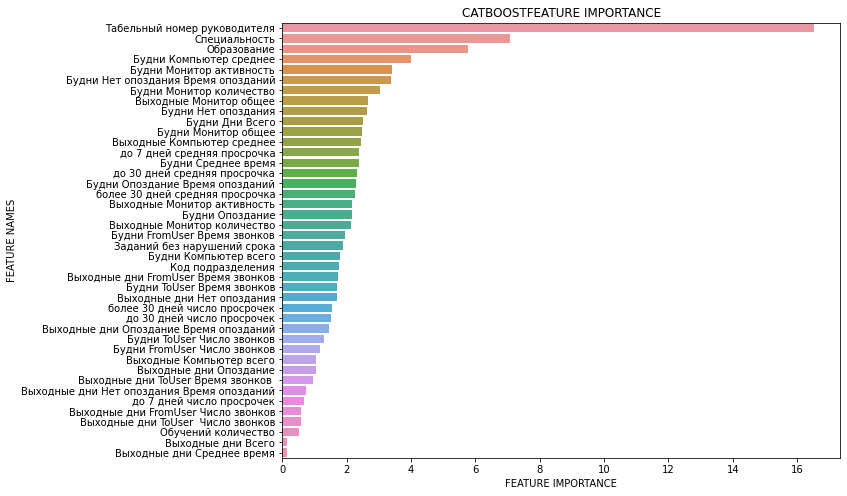

In [88]:
# Значимость признаков CatBoost в модели прогностики

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

#plot the catboost result
plot_feature_importance(model_test.get_feature_importance(),X_train.columns,'CATBOOST')

In [89]:
#Получение ответов
y_pred_solution = model_test.predict(testnet_solution)

In [90]:
# Заводим результаты в тест
test['Prognoz']=y_pred_solution
test['Prognoz'].value_counts()

1    156
0    106
Name: Prognoz, dtype: int64

In [91]:
test.loc[(test['Prognoz']==1),'type']=2
test.loc[(test['Prognoz']==0),'type']=0

In [92]:
test_itog=test[['id','type']]
test_itog

,id,type
0,ОРГ1-02649,0
1,ОРГ2-05929,0
2,ОРГ2-05859,0
3,ОРГ1-00279,0
4,ОРГ2-01613,0
...,...,...
257,ОРГ1-02893,2
258,ОРГ2-01077,0
259,ОРГ1-00469,0
260,ОРГ1-02060,2


In [93]:
test_itog.to_csv('Якутия старт проверка_69_p.csv', sep=',', index=None)

In [94]:
test_summ= pd.read_csv('Якутия старт проверка_summ_p_15_3.csv', sep=',', index_col=None)

In [95]:
test_summ['Summ'].value_counts()

6    136
0     89
4     19
2     18
Name: Summ, dtype: int64

In [96]:
test_summ['type']=0
test_summ.loc[(test_summ['Summ']==6),'type']=2
test_summ['type'].value_counts()

2    136
0    126
Name: type, dtype: int64

In [97]:
test_summ=test_summ[['id','type']]
test_summ.to_csv('Якутия старт проверка сумм_p_15.csv', sep=',', index=None)

In [98]:
test['Prognoz']=test_summ['type']
test['Prognoz'].value_counts()

2    136
0    126
Name: Prognoz, dtype: int64

In [99]:
train_summ= pd.read_csv('Якутия train_summ_p_3.csv', sep=',', index_col=None)

In [100]:
train_summ['Summ'].value_counts()

3    276
0    232
2     22
1     20
Name: Summ, dtype: int64

In [101]:
train['Prognoz']=train_summ['Summ']

In [102]:
test_0=test.loc[(test['Prognoz']==0)]
train_0=train.loc[(train['Category']==0)|(train['Prognoz']!=3)]

In [103]:
test_0

,id,Код подразделения,type,Заданий без нарушений срока,более 30 дней средняя просрочка,более 30 дней число просрочек,до 30 дней средняя просрочка,до 30 дней число просрочек,до 7 дней средняя просрочка,до 7 дней число просрочек,Образование,Специальность,Табельный номер руководителя,Обучений количество,Будни FromUser Число звонков,Будни FromUser Время звонков,Будни ToUser Число звонков,Будни ToUser Время звонков,Выходные дни FromUser Число звонков,Выходные дни FromUser Время звонков,Выходные дни ToUser Число звонков,Выходные дни ToUser Время звонков,Будни Нет опоздания,Будни Нет опоздания Время опозданий,Будни Опоздание,Будни Опоздание Время опозданий,Выходные дни Нет опоздания,Выходные дни Нет опоздания Время опозданий,Выходные дни Опоздание,Выходные дни Опоздание Время опозданий,Будни Дни Всего,Будни Среднее время,Выходные дни Всего,Выходные дни Среднее время,Будни Компьютер всего,Будни Компьютер среднее,Выходные Компьютер всего,Выходные Компьютер среднее,Будни Монитор количество,Будни Монитор активность,Будни Монитор общее,Выходные Монитор количество,Выходные Монитор активность,Выходные Монитор общее,Prognoz
0,ОРГ1-02649,ОРГ1,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,Неизвестно,Неизвестно,0,0.0,4.0,0.110278,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,32.0,9.880729,0.0,0.0,56.0,21710.750000,1.0,300.000000,704.0,1548.024148,7381.465909,24.0,13.916667,85936.458333,0
1,ОРГ2-05929,ОРГ2,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,Высшее образование - бакалавриат,Инженерно-геодезическое обеспечение и техничес...,ОРГ2-00539,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,77.0,0.173267,18.0,85.808184,5.0,0.000000,1.0,8.356658,0.0,0.000000,0.0,0.0,94.0,15180.223404,6.0,5604.333333,679.0,1839.889543,3344.527246,21.0,1330.190476,6647.476190,0
2,ОРГ2-05859,ОРГ2,0,1.0,203.894737,19.0,0.000000,0.0,0.000000,0.0,Среднее общее образование,не указано,ОРГ2-04561,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,143.0,4.935355,104.0,165.960438,2.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,245.0,15580.918367,2.0,10351.500000,1628.0,1739.829853,2604.855651,16.0,876.812500,2548.687500,0
3,ОРГ1-00279,ОРГ1,0,490.0,35.000000,1.0,13.500000,8.0,3.055556,18.0,"Высшее образование, Повышение квалификации","Промышленное и гражданское строительство, не у...",ОРГ1-00483,2.0,4477.0,213.246667,3657.0,134.312222,7.0,0.678333,22.0,0.032778,122.0,0.344013,11.0,41.522641,1.0,0.000000,4.0,12.320011,17.0,9.030392,0.0,0.0,132.0,28066.303030,5.0,6723.800000,2272.0,1419.474912,3564.021127,56.0,500.714286,29866.732143,0
4,ОРГ2-01613,ОРГ2,0,6.0,207.000000,1.0,19.000000,2.0,0.000000,0.0,"Высшее образование - специалитет, магистратура",Промышленное и гражданское строительство,ОРГ2-02458,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,119.0,2.227617,17.0,19.809010,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,135.0,15394.585185,0.0,0.000000,1198.0,1394.794658,6032.730384,5.0,0.000000,85885.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,ОРГ1-02925,ОРГ1,2,12.0,0.000000,0.0,0.000000,0.0,7.000000,1.0,"Высшее образование - бакалавриат, Высшее образ...","Строительство, Строительство",не указано,2.0,1678.0,51.891944,884.0,30.692778,149.0,3.550278,79.0,1.535278,69.0,0.776379,5.0,12.062573,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,73.0,26632.191781,0.0,0.000000,939.0,1738.855165,2057.811502,0.0,0.000000,0.000000,0
255,ОРГ2-04036,ОРГ2,2,2045.0,62.285714,7.0,15.800000,10.0,2.354839,31.0,Высшее образование - бакалавриат,Юриспруденция,не указано,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,129.0,0.372237,7.0,12.564846,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,135.0,25681.829630,0.0,0.000000,1609.0,1619.227470,2233.211933,0.0,0.000000,0.000000,0
258,ОРГ2-01077,ОРГ2,0,1.0,242.500000,2.0,0.000000,0.0,2.000000,1.0,"Высшее образование - специалитет, ма

In [104]:
train_0['Category'].value_counts()

0    252
1     29
Name: Category, dtype: int64

In [105]:
# бинаризируем поля трейна, категория 0= 1, остальные =0
train_0['Category']=0
train_0.loc[(train_0['type']==0),'Category']=1
train_0['Category'].value_counts()

C:\Users\balan\AppData\Local\Temp\ipykernel_2680\2174866434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_0['Category']=0


1    153
0    128
Name: Category, dtype: int64

In [106]:
X_train=train_0[columns_to_train]
y_train=train_0[['Category']]


testnet=test_0[columns_to_train]

In [107]:
testnet

,Код подразделения,Заданий без нарушений срока,более 30 дней средняя просрочка,более 30 дней число просрочек,до 30 дней средняя просрочка,до 30 дней число просрочек,до 7 дней средняя просрочка,до 7 дней число просрочек,Образование,Специальность,Табельный номер руководителя,Обучений количество,Будни FromUser Число звонков,Будни FromUser Время звонков,Будни ToUser Число звонков,Будни ToUser Время звонков,Выходные дни FromUser Число звонков,Выходные дни FromUser Время звонков,Выходные дни ToUser Число звонков,Выходные дни ToUser Время звонков,Будни Нет опоздания,Будни Нет опоздания Время опозданий,Будни Опоздание,Будни Опоздание Время опозданий,Выходные дни Нет опоздания,Выходные дни Нет опоздания Время опозданий,Выходные дни Опоздание,Выходные дни Опоздание Время опозданий,Будни Дни Всего,Будни Среднее время,Выходные дни Всего,Выходные дни Среднее время,Будни Компьютер всего,Будни Компьютер среднее,Выходные Компьютер всего,Выходные Компьютер среднее,Будни Монитор количество,Будни Монитор активность,Будни Монитор общее,Выходные Монитор количество,Выходные Монитор активность,Выходные Монитор общее
0,ОРГ1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,Неизвестно,Неизвестно,0,0.0,4.0,0.110278,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,32.0,9.880729,0.0,0.0,56.0,21710.750000,1.0,300.000000,704.0,1548.024148,7381.465909,24.0,13.916667,85936.458333
1,ОРГ2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,Высшее образование - бакалавриат,Инженерно-геодезическое обеспечение и техничес...,ОРГ2-00539,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,77.0,0.173267,18.0,85.808184,5.0,0.000000,1.0,8.356658,0.0,0.000000,0.0,0.0,94.0,15180.223404,6.0,5604.333333,679.0,1839.889543,3344.527246,21.0,1330.190476,6647.476190
2,ОРГ2,1.0,203.894737,19.0,0.000000,0.0,0.000000,0.0,Среднее общее образование,не указано,ОРГ2-04561,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,143.0,4.935355,104.0,165.960438,2.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,245.0,15580.918367,2.0,10351.500000,1628.0,1739.829853,2604.855651,16.0,876.812500,2548.687500
3,ОРГ1,490.0,35.000000,1.0,13.500000,8.0,3.055556,18.0,"Высшее образование, Повышение квалификации","Промышленное и гражданское строительство, не у...",ОРГ1-00483,2.0,4477.0,213.246667,3657.0,134.312222,7.0,0.678333,22.0,0.032778,122.0,0.344013,11.0,41.522641,1.0,0.000000,4.0,12.320011,17.0,9.030392,0.0,0.0,132.0,28066.303030,5.0,6723.800000,2272.0,1419.474912,3564.021127,56.0,500.714286,29866.732143
4,ОРГ2,6.0,207.000000,1.0,19.000000,2.0,0.000000,0.0,"Высшее образование - специалитет, магистратура",Промышленное и гражданское строительство,ОРГ2-02458,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,119.0,2.227617,17.0,19.809010,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,135.0,15394.585185,0.0,0.000000,1198.0,1394.794658,6032.730384,5.0,0.000000,85885.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,ОРГ1,12.0,0.000000,0.0,0.000000,0.0,7.000000,1.0,"Высшее образование - бакалавриат, Высшее образ...","Строительство, Строительство",не указано,2.0,1678.0,51.891944,884.0,30.692778,149.0,3.550278,79.0,1.535278,69.0,0.776379,5.0,12.062573,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,73.0,26632.191781,0.0,0.000000,939.0,1738.855165,2057.811502,0.0,0.000000,0.000000
255,ОРГ2,2045.0,62.285714,7.0,15.800000,10.0,2.354839,31.0,Высшее образование - бакалавриат,Юриспруденция,не указано,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,129.0,0.372237,7.0,12.564846,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,135.0,25681.829630,0.0,0.000000,1609.0,1619.227470,2233.211933,0.0,0.000000,0.000000
258,ОРГ2,1.0,242.500000,2.0,0.000000,0.0,2.000000,1.0,"Высшее образование - специалитет, магистратура",Астрономогеодезия,ОРГ2-09100,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,141.0,0.951791,18.0,33.131085,13.0,0.068752,11.0,

In [108]:
# Определяем веса для классов кластеров
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes = np.unique(y_train), y = np.ravel(y_train))
class_weights = dict(zip(classes, weights))
class_weights

{0: 1.09765625, 1: 0.9183006535947712}

In [109]:
#X_train,X_test,y_train,y_test = train_test_split(X_train, 
#                                                 y_train, 
#                                                 test_size=0.1, 
#                                                random_state=24)

In [110]:
#Обучаем 
pool_train_solution = Pool(X_train, y_train, cat_features = ['Код подразделения','Табельный номер руководителя'], text_features = ['Образование', 'Специальность'])
#pool_test_solution = Pool(X_test,y_test, cat_features = ['Код подразделения','Табельный номер руководителя'], text_features = ['Образование', 'Специальность'])
testnet_solution = Pool(testnet, cat_features = ['Код подразделения','Табельный номер руководителя'], text_features = ['Образование', 'Специальность'])

model_test = CatBoostClassifier(iterations=100,  task_type='CPU',depth=12, verbose =True, random_seed=50, learning_rate=0.015,
                               leaf_estimation_method= 'Gradient',bootstrap_type= 'MVS',objective='MultiClass',eval_metric = 'Accuracy',loss_function='MultiClass', class_weights=class_weights)
model_test.fit(pool_train_solution,verbose=True)
#model_test.fit(pool_train_solution,eval_set=pool_test_solution,verbose=True,early_stopping_rounds=25 )

0:	learn: 0.7839818	total: 3.15s	remaining: 5m 11s
1:	learn: 0.8067045	total: 3.69s	remaining: 3m
2:	learn: 0.8504647	total: 7.75s	remaining: 4m 10s
3:	learn: 0.8824295	total: 11.5s	remaining: 4m 37s
4:	learn: 0.8785233	total: 13.6s	remaining: 4m 18s
5:	learn: 0.8856975	total: 17.3s	remaining: 4m 31s
6:	learn: 0.8961397	total: 21.3s	remaining: 4m 42s
7:	learn: 0.9039522	total: 24.9s	remaining: 4m 45s
8:	learn: 0.9045905	total: 28.4s	remaining: 4m 46s
9:	learn: 0.9137561	total: 31.8s	remaining: 4m 46s
10:	learn: 0.9346405	total: 35.3s	remaining: 4m 45s
11:	learn: 0.9509804	total: 39.1s	remaining: 4m 46s
12:	learn: 0.9542484	total: 42.2s	remaining: 4m 42s
13:	learn: 0.9542484	total: 45.6s	remaining: 4m 40s
14:	learn: 0.9607843	total: 49.2s	remaining: 4m 38s
15:	learn: 0.9542484	total: 49.4s	remaining: 4m 19s
16:	learn: 0.9607843	total: 52.9s	remaining: 4m 18s
17:	learn: 0.9607843	total: 56.4s	remaining: 4m 17s
18:	learn: 0.9607843	total: 1m	remaining: 4m 15s
19:	learn: 0.9607843	total: 1

In [111]:
# предварительный тест схождения на всем обучающем множестве
y_pred_0 = model_test.predict(X_train)

In [112]:
print("Значение метрики recall на трейне : ", recall_score(y_train, y_pred_0, average='macro', zero_division=True))

Значение метрики recall на трейне :  0.9595077614379085


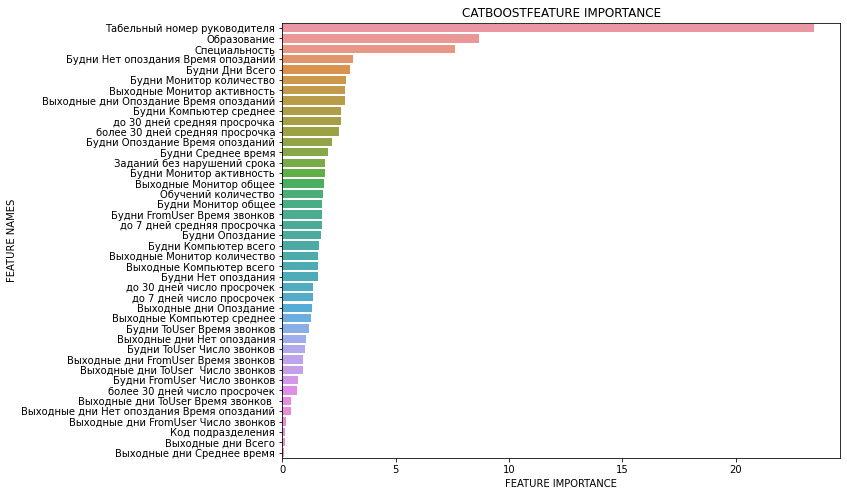

In [113]:
# Значимость признаков CatBoost в модели прогностики

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

#plot the catboost result
plot_feature_importance(model_test.get_feature_importance(),X_train.columns,'CATBOOST')

In [114]:
#Получение ответов
y_pred_solution_0 = model_test.predict(testnet_solution)

In [115]:
# Заводим результаты в итоговый тест
test_0['Prognoz']=y_pred_solution_0
test_0['Prognoz'].value_counts()

C:\Users\balan\AppData\Local\Temp\ipykernel_2680\3756096754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_0['Prognoz']=y_pred_solution_0


1    79
0    47
Name: Prognoz, dtype: int64

In [116]:
test_summ['type'].value_counts()

2    136
0    126
Name: type, dtype: int64

In [117]:
# в итоговом тесте меняем 0 на 1 (следующее по балансу), значение 0 ставим по итоговому 1 из test_0
test_summ['type'].value_counts()
test_summ_0=test_0[['id','Prognoz']]

In [118]:
test_summ.loc[(test_summ['type']==0),'type']=1
test_summ=test_summ.merge(test_summ_0,how='left',on='id')
test_summ

,id,type,Prognoz
0,ОРГ1-02649,1,1.0
1,ОРГ2-05929,1,1.0
2,ОРГ2-05859,1,1.0
3,ОРГ1-00279,1,1.0
4,ОРГ2-01613,1,1.0
...,...,...,...
257,ОРГ1-02893,2,NaN
258,ОРГ2-01077,1,0.0
259,ОРГ1-00469,1,1.0
260,ОРГ1-02060,2,NaN


In [119]:
test_summ.loc[(test_summ['Prognoz']==1),'type']=0

In [120]:
test_summ=test_summ[['id','type']]

In [121]:
test_summ['type'].value_counts()

2    136
0     79
1     47
Name: type, dtype: int64

In [122]:
test['Prognoz']=test_summ['type']
test_fin=test.loc[test['Prognoz']==1]

In [123]:
X_train=train[columns_to_train]
y_train=train[['type']]
testnet=test_fin[columns_to_train]

In [124]:
# Определяем веса для классов кластеров
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes = np.unique(y_train), y = np.ravel(y_train))
class_weights = dict(zip(classes, weights))
class_weights

{0: 0.8986928104575164, 1: 1.8581081081081081, 2: 0.46140939597315433, 3: 5.5}

In [125]:
#X_train,X_test,y_train,y_test = train_test_split(X_train, 
#                                                 y_train, 
    #                                             test_size=0.1, 
     #                                           random_state=77)

In [126]:
#Обучаем 
pool_train_solution = Pool(X_train, y_train, cat_features = ['Код подразделения','Табельный номер руководителя'], text_features = ['Образование', 'Специальность'])
#pool_test_solution = Pool(X_test,y_test, cat_features = ['Код подразделения','Табельный номер руководителя'], text_features = ['Образование', 'Специальность'])
testnet_solution = Pool(testnet, cat_features = ['Код подразделения','Табельный номер руководителя'], text_features = ['Образование', 'Специальность'])

model_test_fin = CatBoostClassifier(iterations=50,  task_type='CPU',depth=12, verbose =True, random_seed=83, learning_rate=0.015,
                               leaf_estimation_method= 'Gradient',bootstrap_type= 'MVS',objective='MultiClass',eval_metric = 'Accuracy',loss_function='MultiClass', class_weights=class_weights)
model_test_fin.fit(pool_train_solution,verbose=True)
#model_test_fin.fit(pool_train_solution,eval_set=pool_test_solution,verbose=True,early_stopping_rounds=25 )

0:	learn: 0.7747279	total: 12.3s	remaining: 12m 7s
1:	learn: 0.8323112	total: 24.3s	remaining: 11m 45s
2:	learn: 0.8645030	total: 36.1s	remaining: 11m 26s
3:	learn: 0.8762706	total: 48.2s	remaining: 11m 14s
4:	learn: 0.9059456	total: 59.6s	remaining: 10m 55s
5:	learn: 0.9177798	total: 1m 10s	remaining: 10m 37s
6:	learn: 0.9129217	total: 1m 21s	remaining: 10m 16s
7:	learn: 0.9211355	total: 1m 32s	remaining: 10m 2s
8:	learn: 0.9327488	total: 1m 46s	remaining: 10m 6s
9:	learn: 0.9302320	total: 1m 59s	remaining: 9m 58s
10:	learn: 0.9335878	total: 2m 12s	remaining: 9m 49s
11:	learn: 0.9394164	total: 2m 27s	remaining: 9m 50s
12:	learn: 0.9394164	total: 2m 28s	remaining: 8m 55s
13:	learn: 0.9419332	total: 2m 43s	remaining: 8m 58s
14:	learn: 0.9443183	total: 2m 47s	remaining: 8m 21s
15:	learn: 0.9452011	total: 3m	remaining: 8m 17s
16:	learn: 0.9518687	total: 3m 14s	remaining: 8m 12s
17:	learn: 0.9468790	total: 3m 28s	remaining: 8m 7s
18:	learn: 0.9526637	total: 3m 40s	remaining: 7m 56s
19:	lea

In [127]:
# предварительный тест схождения на всем обучающем множестве
y_pred_fin = model_test_fin.predict(X_train)

In [128]:
print("Значение метрики recall на трейне : ", recall_score(y_train, y_pred_fin, average='macro', zero_division=True))

Значение метрики recall на трейне :  0.8654278182643756


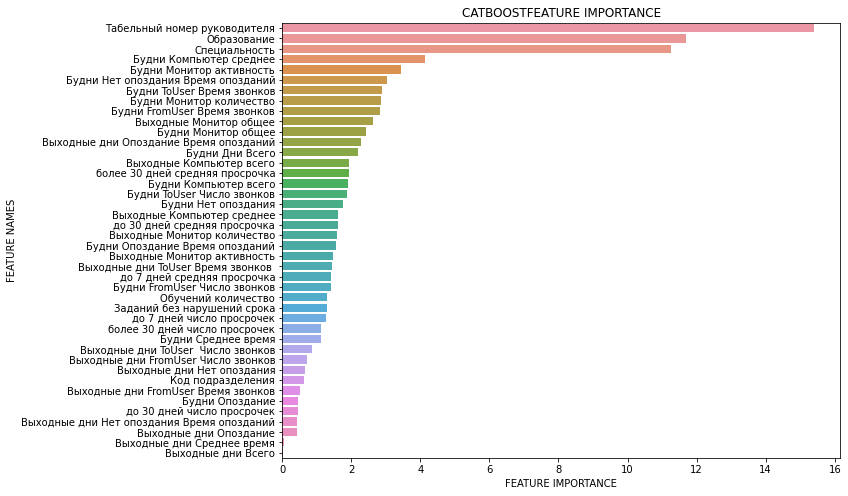

In [129]:
# Значимость признаков CatBoost в модели прогностики

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

#plot the catboost result
plot_feature_importance(model_test_fin.get_feature_importance(),X_train.columns,'CATBOOST')

In [130]:
#Получение ответов
y_pred_solution_fin = model_test_fin.predict(testnet_solution)

In [131]:
test_summ=test_summ[['id','type']]

In [132]:
test_fin['Prognoz']=y_pred_solution_fin
test_fin['Prognoz'].value_counts()

C:\Users\balan\AppData\Local\Temp\ipykernel_2680\3125071044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_fin['Prognoz']=y_pred_solution_fin


1    29
2    11
3     5
0     2
Name: Prognoz, dtype: int64

In [133]:
test_finn_all=test_fin[['id','Prognoz']]
test_summ=test_summ.merge(test_finn_all,how='left',on='id')
test_summ

,id,type,Prognoz
0,ОРГ1-02649,0,NaN
1,ОРГ2-05929,0,NaN
2,ОРГ2-05859,0,NaN
3,ОРГ1-00279,0,NaN
4,ОРГ2-01613,0,NaN
...,...,...,...
257,ОРГ1-02893,2,NaN
258,ОРГ2-01077,1,1.0
259,ОРГ1-00469,0,NaN
260,ОРГ1-02060,2,NaN


In [134]:
test_summ.loc[(~test_summ['Prognoz'].isna()),'type']=test_summ['Prognoz']

In [135]:
test_summ=test_summ[['id','type']]
test_summ['type']=test_summ['type'].astype(int)
test_summ['type'].value_counts()


C:\Users\balan\AppData\Local\Temp\ipykernel_2680\3210986916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_summ['type']=test_summ['type'].astype(int)


2    147
0     81
1     29
3      5
Name: type, dtype: int64

In [136]:
test_summ.to_csv('Якутия воспроизводимый результат_.csv', sep=',', index=None)